In [1]:
import sys
sys.executable

'/usr/local/opt/python@3.9/bin/python3.9'

In [54]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
DATA_DIR_TRAIN = r'/Users/stav/Projects/CodeSH/vgg_for_final_project/TRAIN'
SEED           = 42
EPOCHS         = 4


def load_vgg_model():
    vgg19 = VGG19(weights='imagenet',
              include_top=False,
              input_shape=(32, 32, 3)
              )
    model = Sequential()
    model.add(vgg19)
    model.add(Flatten())
    model.add(Dense(28, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model


def train_model(model):
    # load the paths and labels in differnt variables
    filepaths, labels = image_files(DATA_DIR_TRAIN) # 5,099 files
    print(f'Using {len(filepaths):,} files for training.')
    # load the 10K images
    images = load_images(filepaths)
    y = to_categorical(labels, num_classes=28)
    X_train, X_test, y_train, y_test = train_test_split(images, y, random_state=SEED, test_size=0.2)
    print('X_train.shape:', X_train.shape)
    print('X_test.shape:',  X_test.shape)
    history = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=128,
        validation_data=(X_test, y_test)
    )
    return history

In [18]:
model = load_vgg_model()
model.summary()

2023-06-06 08:37:29.351748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 28)                14364     
                                                                 
Total params: 20,038,748
Trainable params: 20,038,748
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Model Training & Evaluation

In [21]:
history = train_model(model)

Using 5,099 files for training.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5099/5099 [00:03<00:00, 1417.86it/s]


X_train.shape: (4079, 32, 32, 3)
X_test.shape: (1020, 32, 32, 3)
Epoch 1/4
32/32 [==============================] - 101s 3s/step - loss: 2.9750 - accuracy: 0.1768 - val_loss: 2.9016 - val_accuracy: 0.1980
Epoch 2/4
32/32 [==============================] - 86s 3s/step - loss: 2.0402 - accuracy: 0.4428 - val_loss: 1.2936 - val_accuracy: 0.6255
Epoch 3/4
32/32 [==============================] - 85s 3s/step - loss: 0.9986 - accuracy: 0.7043 - val_loss: 1.2829 - val_accuracy: 0.6471
Epoch 4/4
32/32 [==============================] - 84s 3s/step - loss: 0.7428 - accuracy: 0.7811 - val_loss: 0.7760 - val_accuracy: 0.7912


In [22]:
model

In [24]:
# load the paths and labels in differnt variables
filepaths, labels = image_files(DATA_DIR_TRAIN) # 5,099 files
print(f'Using {len(filepaths):,} files for training.')
# load the 10K images
images = load_images(filepaths)
y = to_categorical(labels, num_classes=28)
X_train, X_test, y_train, y_test = train_test_split(images, y, random_state=SEED, test_size=0.2)

Using 5,099 files for training.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5099/5099 [00:04<00:00, 1247.16it/s]


In [25]:
y_pred = model.predict(X_test)

32/32 [==============================] - 2s 63ms/step


In [83]:
for i, item in enumerate(['stav1', 'stav2']):
    print(i, item)

0 stav1
1 stav2


In [81]:
list(enumerate(abc))

[(0, 'א'),
 (1, 'ב'),
 (2, 'ג'),
 (3, 'ד'),
 (4, 'ה'),
 (5, 'ו'),
 (6, 'ז'),
 (7, 'ח'),
 (8, 'ט'),
 (9, 'י'),
 (10, 'כ'),
 (11, 'ך'),
 (12, 'ל'),
 (13, 'מ'),
 (14, 'ם'),
 (15, 'נ'),
 (16, 'ן'),
 (17, 'ס'),
 (18, 'ע'),
 (19, 'פ'),
 (20, 'ף'),
 (21, 'צ'),
 (22, 'ץ'),
 (23, 'ק'),
 (24, 'ר'),
 (25, 'ש'),
 (26, 'ת'),
 (27, ',')]

In [78]:
cm_df = pd.DataFrame(conf_matrix,
                     # index = ['setosa','versicolor','virginica'], 
                     index = list(abc),
                     columns = list(abc))

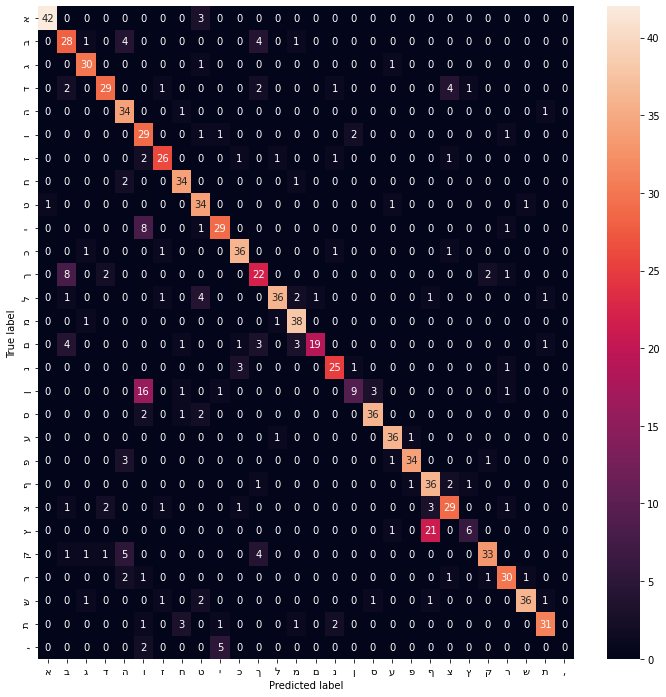

In [79]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_df, annot=True)
# plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [82]:
for img_idx in range(100):
    prob = model.predict(X_test[img_idx].reshape(1, 32, 32, 3))
    y_pred   = np.argmax(prob)            # softmax output
    y_actual = np.argmax(y_test[img_idx]) # one-hot encoding
    if y_pred != y_actual:
        print('Error for index:', img_idx)

1/1 [==============================] - 0s 51ms/step
Error for index: 0
1/1 [==============================] - 0s 37ms/step
Error for index: 2
1/1 [==============================] - 0s 42ms/step
Error for index: 4
1/1 [==============================] - 0s 34ms/step
Error for index: 5
1/1 [==============================] - 0s 40ms/step
Error for index: 10
1/1 [==============================] - 0s 38ms/step
Error for index: 11
1/1 [==============================] - 0s 33ms/step
Error for index: 21
1/1 [==============================] - 0s 37ms/step
Error for index: 23
1/1 [==============================] - 0s 34ms/step
Error for index: 25
1/1 [==============================] - 0s 35ms/step
Error for index: 31
1/1 [==============================] - 0s 33ms/step
Error for index: 35
1/1 [==============================] - 0s 40ms/step
Error for index: 38
1/1 [==============================] - 0s 35ms/step
Error for index: 39
1/1 [==============================] - 0s 33ms/step
Error for index:

In [83]:
img_idx = 79
prob = model.predict(X_test[img_idx].reshape(1, 32, 32, 3))
y_pred   = np.argmax(prob)            # softmax output
y_actual = np.argmax(y_test[img_idx]) # one-hot encoding

1/1 [==============================] - 0s 39ms/step


In [85]:
y_pred, y_actual

(26, 14)

In [109]:
prob

array([[5.2701775e-04, 1.7752871e-04, 7.4542462e-05, 1.2391385e-04,
        4.4470813e-05, 5.2801561e-06, 1.2626484e-04, 1.3309697e-04,
        3.8806818e-05, 3.7252287e-06, 3.0750962e-05, 2.5051946e-04,
        3.1568683e-03, 4.0978044e-05, 1.7307270e-02, 3.9947601e-03,
        1.6768216e-04, 1.7573951e-05, 6.6044577e-04, 1.6924777e-04,
        1.8496968e-02, 1.0224337e-03, 1.4309661e-01, 2.4420233e-04,
        5.5946282e-05, 1.0446213e-04, 8.0987108e-01, 5.7500467e-05]],
      dtype=float32)

In [108]:
for i, p in enumerate(prob[0]):
    print(f'{i:02}.  {p:.6f}')

00.  0.000527
01.  0.000178
02.  0.000075
03.  0.000124
04.  0.000044
05.  0.000005
06.  0.000126
07.  0.000133
08.  0.000039
09.  0.000004
10.  0.000031
11.  0.000251
12.  0.003157
13.  0.000041
14.  0.017307
15.  0.003995
16.  0.000168
17.  0.000018
18.  0.000660
19.  0.000169
20.  0.018497
21.  0.001022
22.  0.143097
23.  0.000244
24.  0.000056
25.  0.000104
26.  0.809871
27.  0.000058


In [92]:
import seaborn as sns

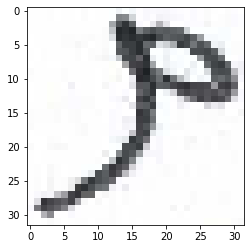

In [87]:
plt.imshow(X_test[img_idx]);

In [67]:
np.argmax(prob)

25

In [69]:
y_test[120]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [70]:
np.argmax(y_test[120])

25

In [43]:
score = model.evaluate(X_test, y_test)

32/32 [==============================] - 3s 81ms/step - loss: 0.8722 - accuracy: 0.7441


In [47]:
score

[0.8721778988838196, 0.7441176176071167]

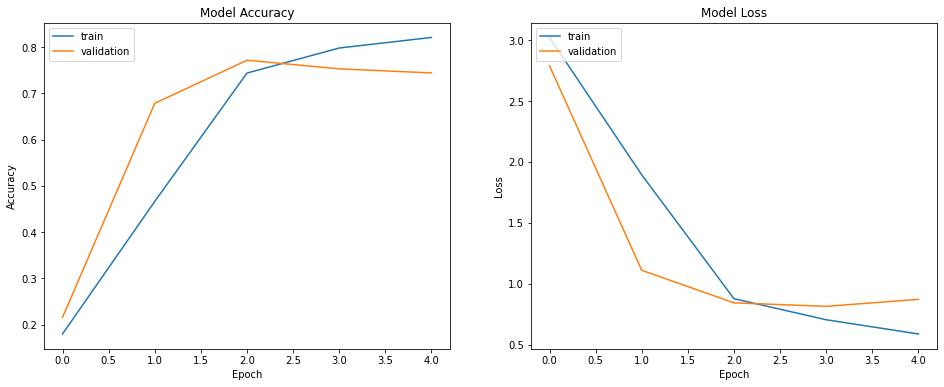

In [46]:
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['train', 'validation'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['train', 'validation'], loc='upper left')

plt.show()
